# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [32]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 

from pandas.plotting import scatter_matrix # библиотека для визуализации данных
import seaborn as sns # библиотека для визуализации данных
import matplotlib.pyplot as plt # для построения графиков

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

%matplotlib inline

Прочитаем исходные данные:

In [33]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

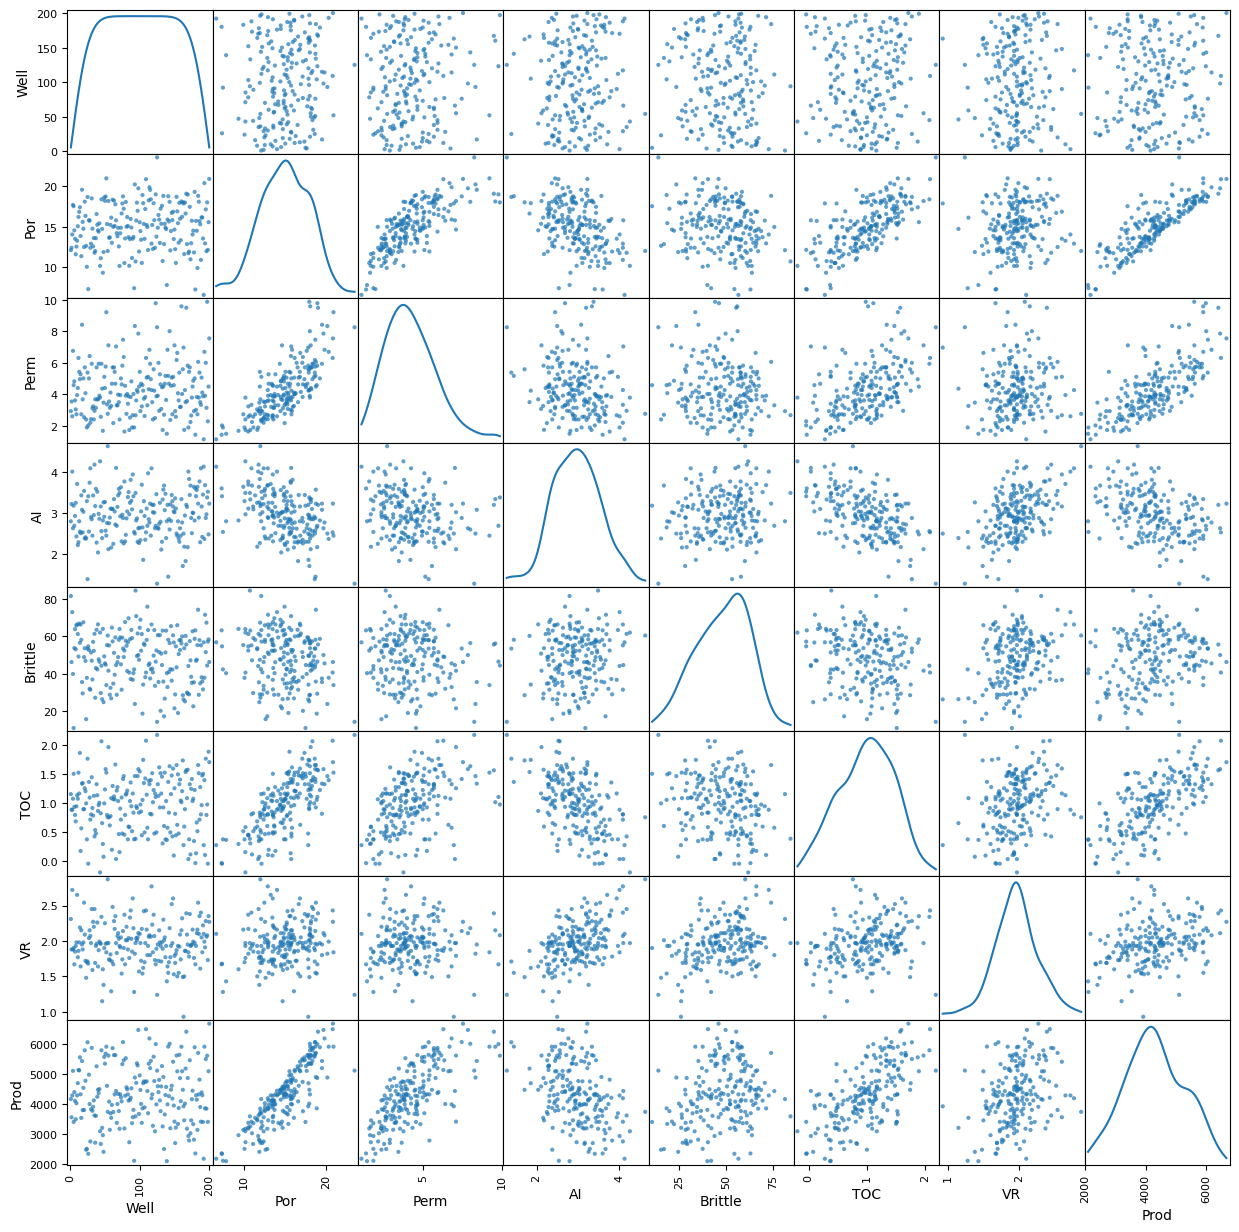

In [34]:
# Ваш код здесь

#Для визуализации предусмотрена матрица рассеивания с графиком KDE
scatter_matrix(data, alpha=0.7, figsize=(15, 15), diagonal="kde");

# Можно сделать следующие выводы
# 1. С целевым признаком Prod видна прямопропорциональная связь с признаками Por (сильно), Perm (слабо) и TOC (очень слабо).
# 2. С целевым признаком Prod видна очень слабая обратнопропорциональная связь с признаком AI.
# 3. Имеется взаимосвязь признака Por с признаками Per и TOC.
# 4. Признаки Por, AI, VR близки к нормальному распределению.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг матрицы: 8
Определитель матрицы: 0.0007299


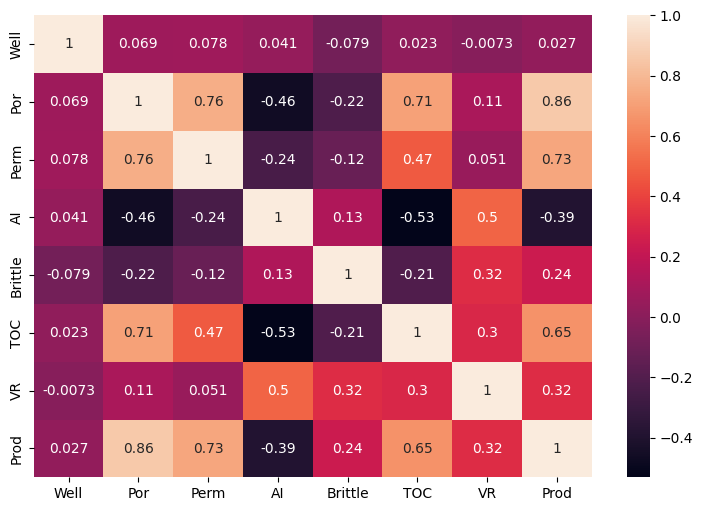

In [35]:
# Ваш код здесь

#Визуализируем матрицу факторов
plt.rcParams['figure.figsize'] = (9,6)
sns.heatmap(data.corr(), annot=True)

#Вычислим матрицу корреляций
A = np.corrcoef(data, rowvar=False)

#Вычислим ранг матрицы
print('Ранг матрицы:', np.linalg.matrix_rank(A)) 

#Вычислим определитель матрицы
print('Определитель матрицы: {:.7f}'.format(np.linalg.det(A)))



> *Ваши выводы здесь*

По построенной корреляционной матрице видно, что с целевой переменной сильнее всего коррелируют фаткоры Por (высокая связь) и Perm (высокая связь).

Ранг матрицы максимальный - чистой коллинеарности нет, но матрица плохо обусловенная, её опредитель близок к нулю. В первую очередь это связано с тем, что имеется корреляция между факторами.
В частности, имеется корреляция между факторами Por и Perm (сильная связь) и между Por и TOC (сильная связь), поэтому можно говорить о мультиколлинеарности.
Несмотря на то, что мультиколлинеарность делает матрицу корреляций более вырожденной, она не оказывает прямого влияния на точность модели сама по себе; матрица не вырожденная, поэтому применима в данном случае модель классической линейной регрессии по методу наименьших квадратов.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [36]:
# Ваш код здесь

#Создадим матрицу наблюдений X и вектор правильных ответов y
Well = data['Well']
Por = data['Por']
Perm = data['Perm']
AI = data['AI']
Brittle = data['Brittle']
TOC = data['TOC']
VR = data['VR']
X = np.column_stack((np.ones(200), Well, Por, Perm, AI, Brittle, TOC, VR))
y = data[['Prod']]

#Постром модель линейной регрессии по методу наименьших квадратов
#Вычисляем OLS-оценку для коэффициентов без стандартизации
#Выведем на экран полученные оценки коэффициентов модели
w = np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты модели')
print(w.values.round())



Коэффициенты модели
[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


> *Ваши выводы здесь*
По данным коэффициентам неинформатиным является признак Well; это логично, так как Well - это просто идентификатор скважены и никак не может влиять на объемы добычи газа.
В виду того, что данные не стандартизованы (требования к стандартизации появляются только в задании 8.1), тем не менее можно говорить о том, что увеличение значений аккустического импенданса (AI) и общего органического углерода будут уменьшать значение объема добычи газа. Влияние признака AI больше признака Por, следовательно при изменении на единицу обеих признаков общее значение целевой переменной уменьшится.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [37]:
# Ваш код здесь

#Построим прогноз выработки газа x_new
x_new = np.array([[1,106,15.32,3.71,3.29,55.99,1.35,2.42]]) #значения факторов по заданию
y_new = 4748.315024 #Реальное значение выработки
y_pred = x_new@w #прогнозное значение выработки газа
AE_pred = y_new - y_pred.values[0] #Рассчёт абсолютной ошибки
print('а) прогноз выработки газа')
print('Абсолютная ошибка {:.6f}'.format(AE_pred[0]))
print('\n')

#Построим прогноз выработки газа для всех скважин из обучающего набора данных
y_predict = (X@w).values
print('б) прогноз выработки газа для всех скважин из обучающего набора данных')
print('MAE {:.6f}'.format(mean_absolute_error(y, y_predict)))

а) прогноз выработки газа
Абсолютная ошибка 25.250970


б) прогноз выработки газа для всех скважин из обучающего набора данных
MAE 153.622971


> *Ваши выводы здесь*

Основной метрикой принята метрика MAE, так как целевой признак (выработка) достаточно понятен для анализа, понятен, что из себя представляет, и Заказчик сможет пересчитать ошибку в стоимостные показатели. По результатам видно, что ошибка в разовом прогнозе по заданию а) значительно отличается от средней абсолютной ошибки, но в лучшую сторону; т.е. нельзя говорить о переобучении.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [38]:
# Ваш код здесь

> *Ваши выводы здесь*
По итогам видно, что в модели имеется фактор, а именно TOC, у которого коэффицент противоречит коэффициенту корреляции, а именно: в модели фактор TOC показывает обратную зависимость с целевой переменной, а в матрице корреляции - прямую. Основные причины - значения факторов не стандартизованы и имеется корреляция признаков.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [39]:
# Ваш код здесь

#Отобранные факторы
Por = data['Por']
AI = data['AI']
Brittle = data['Brittle']
VR = data['VR']
#Построим модель линейной регрессии с помощью МНК и параметры модели
X = np.column_stack((np.ones(200), Por, AI, Brittle, VR))
y = data[['Prod']]
w = np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты модели')
print(w.values.round())
print('\n')

#прогноз для всего обучающего набора данных
y_predict = (X@w).values
print('Средняя абсолютная ошибка')
print('MAE {:.6f}'.format(mean_absolute_error(y, y_predict)))

Коэффициенты модели
[[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]


Средняя абсолютная ошибка
MAE 171.431461


> *Ваши выводы здесь*

Имеется взаимосвязь признака Por с признаками Per и TOC. Признак Por больше всего коррелирует с целевой переменной; поэтом Per и TOC - исключаются. Признак Well имеет очень слабую корреляцию с целевой переменной; Well - исключается из данных.

Видно, что значения коэффициентов изменились: теперь, значение коэффициента Por больше значения коэффициента AI; это значит, что при одновременном увеличении на единицу признаков Por и AI значение целевой переменной увеличится.

Метрика показала, что в среднем ошибка в прогнозе составляет ориентировочно 171 млн. кубических футов. Метрика показала ухудшение качества модели.

Побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции удалось.


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [40]:
# Ваш код здесь

# Построим модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(X, y)
print('Коэффициенты модели')
print('w:', model.coef_.round())
print('\n')

#прогноз для всего обучающего набора данных
y_pred = model.predict(X)
print('Средняя абсолютная ошибка')
print('MAE {:.6f}'.format(mean_absolute_error(y, y_pred)))

Коэффициенты модели
w: [[-1835.   293.  -200.    28.   517.]]


Средняя абсолютная ошибка
MAE 171.431461


> *Ваши выводы здесь*

Результаты библиотечной реализации аналогичны с тем, что получили в задании 5.5

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [42]:
# Ваш код здесь

#Стандартизуем признаки
s_scaler = preprocessing.StandardScaler()
data_scale = data[['Por', 'AI', 'Brittle', 'VR']].copy()
X_scale  = pd.DataFrame(
    s_scaler.fit_transform(pd.DataFrame(data_scale)),
    columns=data_scale.columns)
y = data[['Prod']]

#Сгенерируем полиномиальные признаки третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scale)
print('Количество факторов после генерации полиномиальных признаков (без учета интерсепта): {}'.format(X_poly.shape[1]))
print('\n')

model_poly = LinearRegression(fit_intercept = True)
cv_results = cross_validate(model_poly, X_poly, y, scoring=('neg_mean_absolute_error'), cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.6f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.6f}'.format(-cv_results['test_score'].mean()))

Количество факторов после генерации полиномиальных признаков (без учета интерсепта): 34


MAE на тренировочных фолдах: 75.345310
MAE на валидационных фолдах: 110.473609


> *Ваши выводы здесь*

По метрике видно, что использование полиномиальных признаков улучшело среднее прогнозирование относительно моделей раздела 5. НО, результаты на валидационных фолдах намного хуже, чем на тренеровочных. Это говорит о переобучении модели.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [43]:
# Ваш код здесь

#Используя GridSearchCV найдем наилучшие значения гиперпараметров
param_grid = {'alpha': np.arange(0, 10, 0.01) ,#коэффициент регуляризации              
              }
grid_search = GridSearchCV(
    estimator=Lasso(  
        random_state=42, #генератор случайных чисел      
        max_iter=10000 #количество итераций
    ), 
    param_grid=param_grid,
    scoring=('neg_mean_absolute_error'), 
    cv=5, 
    n_jobs = -1,
    return_train_score=True
) 
%time grid_search.fit(X_poly, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print('\n')

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=4.61, max_iter=10000, random_state=42)

cv_lasso = cross_validate(lasso, X_poly, y, scoring=('neg_mean_absolute_error'), cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.6f}'.format(-cv_lasso['train_score'].mean()))
print('MAE на валидационных фолдах: {:.6f}'.format(-cv_lasso['test_score'].mean()))

CPU times: total: 2.59 s
Wall time: 11.2 s
Наилучшие значения гиперпараметров: {'alpha': 4.61}


MAE на тренировочных фолдах: 78.016381
MAE на валидационных фолдах: 95.659858


> *Ваши выводы здесь*

По метрике видно, что на тренировочных фолдах мало изменилось значение ошибки относительно варианта без регуляризации, но средняя ошибка на валидационных фолдах уменьшилась и приблизилась к тренировочным. Регуляризация L1 улучшила ситуацию по переобучению.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [44]:
# Ваш код здесь

#Используя GridSearchCV найдем наилучшие значения гиперпараметров
param_grid = {'alpha': np.arange(0, 10, 0.01) #коэффициент регуляризации
              }
grid_search = GridSearchCV(
    estimator=Ridge(  
        random_state=42, #генератор случайных чисел
        solver='svd',      
        max_iter=10000 #количество итераций
    ), 
    param_grid=param_grid,
    scoring=('neg_mean_absolute_error'), 
    cv=5, 
    n_jobs = -1,
    return_train_score=True
) 
%time grid_search.fit(X_poly, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print('\n')

# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=0.21, solver='svd', random_state=42)

# оцениваем качество модели на кросс-валидации
cv_ridge = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.6f}'.format(-cv_ridge['train_score'].mean()))
print('MAE на валидационных фолдах: {:.6f}'.format(-cv_ridge['test_score'].mean()))

CPU times: total: 2.38 s
Wall time: 7.1 s
Наилучшие значения гиперпараметров: {'alpha': 0.21}


MAE на тренировочных фолдах: 75.413672
MAE на валидационных фолдах: 110.069266


> *Ваши выводы здесь*

По метрике видно, что регуляризация L2 аналогична ситуации без регуляризации в целом.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [45]:
# Ваш код здесь

#Используя GridSearchCV найдем наилучшие значения гиперпараметров
param_grid = {'alpha': np.arange(0, 10, 0.01),              
              'l1_ratio': np.arange(0.1, 1, 0.05)
              }
grid_search = GridSearchCV(
    estimator=ElasticNet(  
        random_state=42, #генератор случайных чисел      
        max_iter=10000 #количество итераций
    ), 
    param_grid=param_grid,
    scoring=('neg_mean_absolute_error'), 
    cv=5, 
    n_jobs = -1,
    return_train_score=True
) 
%time grid_search.fit(X_poly, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print('\n')

elasticnet = ElasticNet(alpha=0.04, l1_ratio=0.95, max_iter=10000, random_state=42)

# оцениваем качество модели на кросс-валидации
cv_elasticnet= cross_validate(elasticnet, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.6f}'.format(-cv_elasticnet['train_score'].mean()))
print('MAE на валидационных фолдах: {:.6f}'.format(-cv_elasticnet['test_score'].mean()))


CPU times: total: 46.4 s
Wall time: 2min 22s
Наилучшие значения гиперпараметров: {'alpha': 0.04, 'l1_ratio': 0.9500000000000003}


MAE на тренировочных фолдах: 75.515739
MAE на валидационных фолдах: 109.712018


> *Ваши выводы здесь*

По метрике видно, что комбинация регуляризаций L1 и L2 аналогична ситуации без регуляризации в целом.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [46]:
# Ваш код здесь

# Формируем сводную таблицу результатов
Sym = {'Наименование модели': ['w', 'model', 'model_poly', 'cv_lasso', 'cv_ridge', 'cv_elasticnet'], 
       'Гиперпараметры': ['', '', '', 'alpha: 4.61', 'alpha: 0.21; solver: svd', 'alpha: 0.04; l1_ratio=0.95'], 
       'Поли.признаки': ['Нет', 'Нет', 'Да', 'Да', 'Да', 'Да'], 
       'MAE train, млн.куб.фут.': ['171.431461', '171.431461', '75.345310', '78.016381', '75.413672', '75.515739'], 
       'MAE test, млн.куб.фут.': ['', '', '110.473609', '95.659858', '110.069266', '109.712018']}
SymData = pd.DataFrame(Sym)
SymData = SymData.style.set_table_styles([
                                {
                                    "selector" :".row3",
                                    "props": [("background-color", "green")]
                                }
                               ]
                             )
SymData

,Наименование модели,Гиперпараметры,Поли.признаки,"MAE train, млн.куб.фут.","MAE test, млн.куб.фут."
0,w,,Нет,171.431461,
1,model,,Нет,171.431461,
2,model_poly,,Да,75.345310,110.473609
3,cv_lasso,alpha: 4.61,Да,78.016381,95.659858
4,cv_ridge,alpha: 0.21; solver: svd,Да,75.413672,110.069266
5,cv_elasticnet,alpha: 0.04; l1_ratio=0.95,Да,75.515739,109.712018


> *Ваши выводы здесь*

По итогам работы видно, что наилучший вариант с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности показала модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах с L1-регуляризацией.